# **Relax Inc. Take-Home Challenge**

### Loading Datas

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')


In [50]:
df_detail = pd.read_csv('takehome_user_engagement.csv')
df_detail.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [51]:
df_detail.shape

(207917, 3)

In [52]:
df_user = pd.read_csv('takehome_users.csv', encoding='ISO-8859-1')
df_user.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [53]:
df_user.shape

(12000, 10)

#### Merging, handling missing values 

In [54]:
# Merge the datasets on user id
df_merged = pd.merge(df_user, df_detail, left_on='object_id', right_on='user_id', how='inner')
df_merged.shape

(207917, 13)

In [55]:
# Check for user_id = 10
df_merged[df_merged.user_id==10].head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,time_stamp,user_id,visited
20,10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,1.401833e+09,1,1,318,4143.0,2013-01-16 22:08:03,10,1
21,10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,1.401833e+09,1,1,318,4143.0,2013-01-22 22:08:03,10,1
22,10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,1.401833e+09,1,1,318,4143.0,2013-01-30 22:08:03,10,1
23,10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,1.401833e+09,1,1,318,4143.0,2013-02-04 22:08:03,10,1
24,10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,1.401833e+09,1,1,318,4143.0,2013-02-06 22:08:03,10,1


In [56]:
df_merged.isna().sum()

object_id                         0
creation_time                     0
name                              0
email                             0
creation_source                   0
last_session_creation_time        0
opted_in_to_mailing_list          0
enabled_for_marketing_drip        0
org_id                            0
invited_by_user_id            91030
time_stamp                        0
user_id                           0
visited                           0
dtype: int64

In [57]:
# fill all na with 0. looks like they signup on thier own.
df_merged.invited_by_user_id.fillna(0,inplace=True)

In [58]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   object_id                   207917 non-null  int64  
 1   creation_time               207917 non-null  object 
 2   name                        207917 non-null  object 
 3   email                       207917 non-null  object 
 4   creation_source             207917 non-null  object 
 5   last_session_creation_time  207917 non-null  float64
 6   opted_in_to_mailing_list    207917 non-null  int64  
 7   enabled_for_marketing_drip  207917 non-null  int64  
 8   org_id                      207917 non-null  int64  
 9   invited_by_user_id          207917 non-null  float64
 10  time_stamp                  207917 non-null  object 
 11  user_id                     207917 non-null  int64  
 12  visited                     207917 non-null  int64  
dtypes: float64(2),

In [59]:
df_merged.duplicated().sum()

0

#### Handling datetime 

In [60]:
df_merged['creation_time'] = pd.to_datetime(df_merged['creation_time'])
df_merged['time_stamp'] = pd.to_datetime(df_merged['time_stamp'])

In [61]:
df_merged.describe().T

,count,mean,min,25%,50%,75%,max,std
object_id,207917.0,5913.314197,1.0,3087.0,5682.0,8944.0,12000.0,3394.941674
creation_time,207917,2013-01-16 06:36:50.297734144,2012-05-31 00:43:27,2012-08-22 20:39:37,2012-12-06 02:21:47,2013-05-12 20:39:27,2014-05-30 23:59:19,NaN
last_session_creation_time,207917.0,1399439486.560858,1338452406.0,1401044707.0,1401664957.0,1401868134.0,1402066730.0,8294017.318421
opted_in_to_mailing_list,207917.0,0.258137,0.0,0.0,0.0,1.0,1.0,0.437611
enabled_for_marketing_drip,207917.0,0.154533,0.0,0.0,0.0,0.0,1.0,0.36146
org_id,207917.0,164.315895,0.0,60.0,145.0,260.0,416.0,121.165846
invited_by_user_id,207917.0,3357.439502,0.0,0.0,1585.0,6442.0,11999.0,3834.871624
time_stamp,207917,2013-10-30 05:06:45.648763648,2012-05-31 08:20:06,2013-07-16 20:17:21,2013-12-03 06:38:34,2014-03-13 08:00:24,2014-06-06 14:58:50,NaN
user_id,207917.0,5913.314197,1.0,3087.0,5682.0,8944.0,12000.0,3394.941674
visited,207917.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0


In [62]:
# Get the current date. which is last date in this case
current_date = df_merged['time_stamp'].max()
print("last login - ",current_date)

#Days since last trip
df_merged['accountAge'] = (current_date - df_merged['creation_time']).dt.days

last login -  2014-06-06 14:58:50


### Cleaning 

In [63]:
# Calculate the number of logins per user per week
df_merged['login_date'] = pd.to_datetime(df_merged['time_stamp'])
df_logins_per_week = df_merged.groupby(['user_id', df_merged['login_date'].dt.to_period('W')])['login_date'].count().reset_index(name='logins_per_week')
df_logins_per_week.head()

,user_id,login_date,logins_per_week
0,1,2014-04-21/2014-04-27,1
1,2,2013-11-11/2013-11-17,1
2,2,2013-11-25/2013-12-01,1
3,2,2013-12-09/2013-12-15,1
4,2,2013-12-23/2013-12-29,1


In [64]:
# Identify adopted users
adopted_users = df_logins_per_week[df_logins_per_week['logins_per_week'] >= 3]['user_id'].unique()
len(adopted_users)

1445

In [65]:
# Calculated number of visits by each user
total_visited = df_merged.groupby(['user_id'])['visited'].count()
total_visited=total_visited.reset_index()
total_visited.sample(5) 

,user_id,visited
7412,10079,3
7980,10848,1
561,767,1
3176,4324,1
4339,5924,1


In [66]:
# Merge the total visits  
df_merged = pd.merge(df_merged,total_visited,on='user_id',how='inner')
df_merged.rename(columns={'visited_y': 'total_visits'}, inplace=True)
df_merged.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,time_stamp,user_id,visited_x,accountAge,login_date,total_visits
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,2014-04-22 03:53:30,1,1,45,2014-04-22 03:53:30,1
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013-11-15 03:45:04,2,1,203,2013-11-15 03:45:04,14
2,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013-11-29 03:45:04,2,1,203,2013-11-29 03:45:04,14
3,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013-12-09 03:45:04,2,1,203,2013-12-09 03:45:04,14
4,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013-12-25 03:45:04,2,1,203,2013-12-25 03:45:04,14


In [67]:
# Add a column to flag adopted users and total visites
df_merged['adopted_user'] = df_merged['user_id'].isin(adopted_users).astype(int)
df_merged.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,time_stamp,user_id,visited_x,accountAge,login_date,total_visits,adopted_user
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,2014-04-22 03:53:30,1,1,45,2014-04-22 03:53:30,1,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013-11-15 03:45:04,2,1,203,2013-11-15 03:45:04,14,1
2,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013-11-29 03:45:04,2,1,203,2013-11-29 03:45:04,14,1
3,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013-12-09 03:45:04,2,1,203,2013-12-09 03:45:04,14,1
4,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013-12-25 03:45:04,2,1,203,2013-12-25 03:45:04,14,1


In [68]:
# Removing unwanted columns
df_merged = df_merged.drop(['name', 'email', 'creation_time','object_id','last_session_creation_time','time_stamp','user_id','visited_x','login_date'],axis=1).copy()

#drop all the duplicates and left with details by each user id
df_merged.drop_duplicates(inplace=True)

In [69]:
creation_source_dummies = pd.get_dummies(df_merged['creation_source'], prefix='creation_source').astype(int)

# Concatenate the dummy variables with the original DataFrame
df = pd.concat([df_merged, creation_source_dummies], axis=1)
df.drop('creation_source',axis=1,inplace=True)
# Replace values in 'invited_by_user_id' column
df['invited_by_user_id'] = df['invited_by_user_id'].apply(lambda x: 1 if x > 1 else 0)
df.head()

,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,accountAge,total_visits,adopted_user,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH
0,1,0,11,1,45,1,0,1,0,0,0,0
1,0,0,1,1,203,14,1,0,1,0,0,0
15,0,0,94,1,443,1,0,0,1,0,0,0
16,0,0,1,1,381,1,0,1,0,0,0,0
17,0,0,193,1,505,1,0,1,0,0,0,0


## EDA

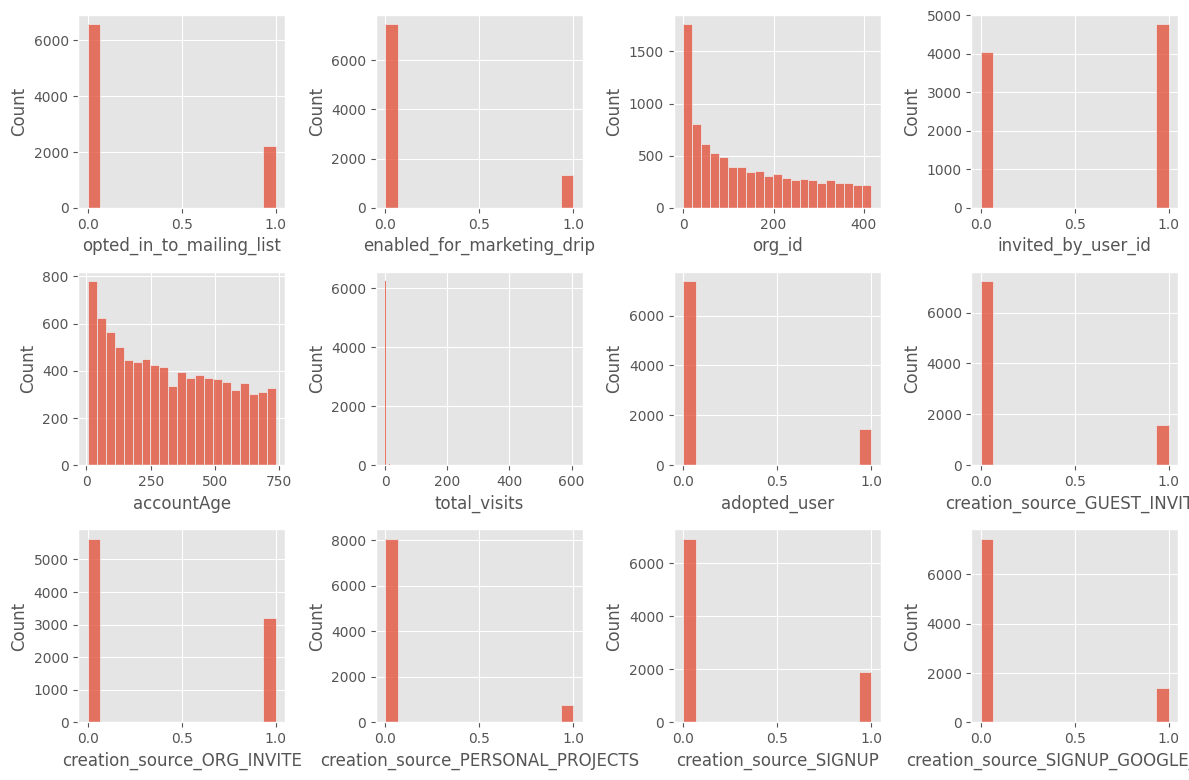

In [70]:
# Explore all the numberic columns
plt.figure(figsize=(12,10))
for i, col in enumerate(df):
    plt.subplot(4,4,i+1)
    sns.histplot(df[col])

plt.tight_layout()
plt.show()

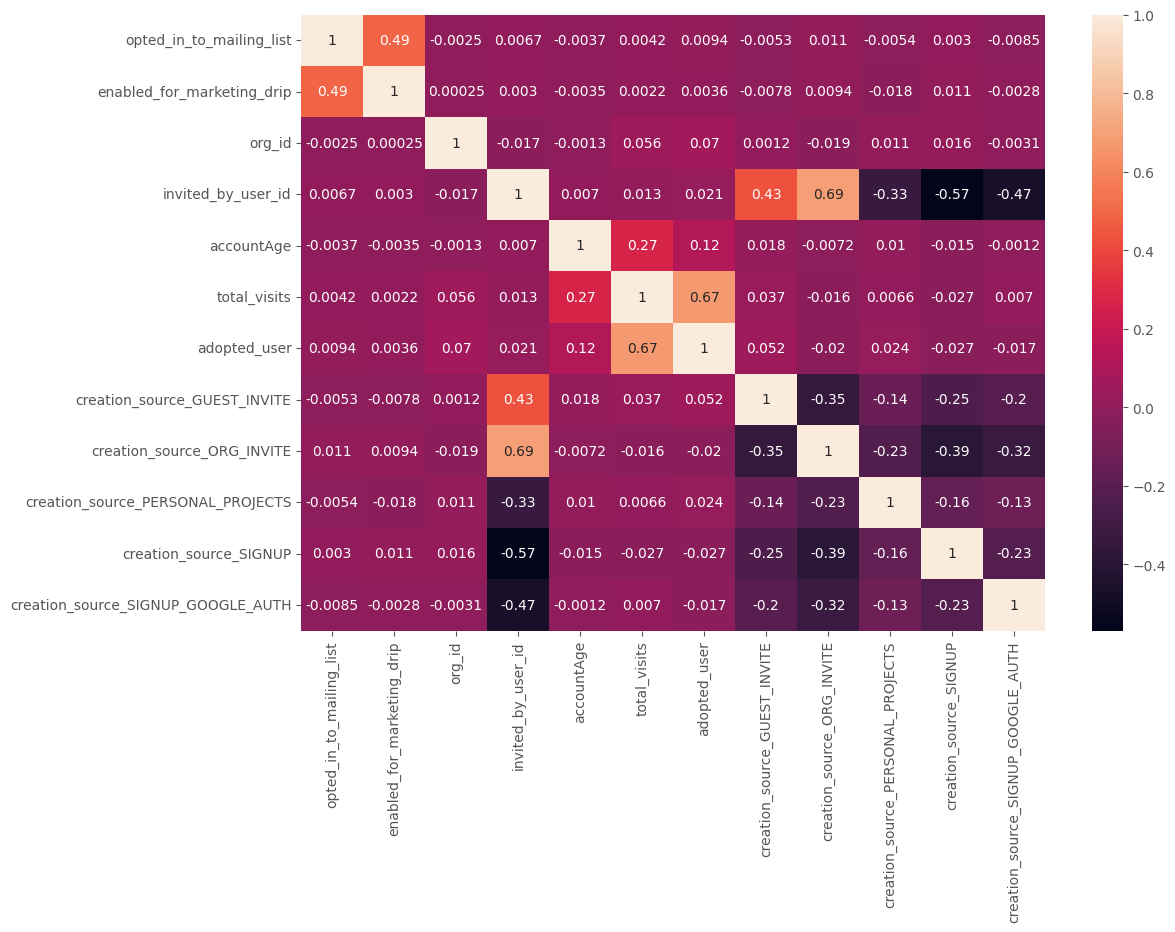

In [71]:
# Exploring Correlation
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True),annot=True);

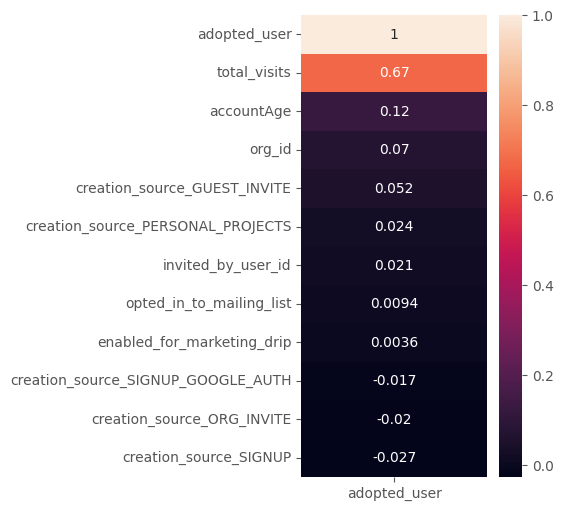

In [72]:
plt.figure(figsize=(3,6))
sns.heatmap(df.corr(numeric_only=True)[['adopted_user']].sort_values(by ='adopted_user',ascending = False),annot=True);

### Feature selection and training 

In [74]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV

X = df.drop(['adopted_user'],axis=1) # independent variables
y = df.adopted_user # target variables

# Scaled the data sets
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size=.2,random_state=37)

### Modeling 

In [76]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

# Define the models and their respective parameter grids
models = {
    'logistic_regression': {
        'model': LogisticRegression(),
        'params': {}
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [10, 50, 100],
            'max_depth': [None, 5, 10]
        }
    },
    'gradient_boosting': {
        'model': GradientBoostingClassifier(),
        'params': {
            'n_estimators': [10, 50, 100],
            'learning_rate': [0.1, 0.05, 0.01]
        }
    }
}

# Apply GridSearchCV for each model
for model_name, model_params in models.items():
    grid_search = GridSearchCV(model_params['model'], model_params['params'], cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    
    # Display best parameters and score for each model
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best cross-validation score for {model_name}: {grid_search.best_score_}")

Best parameters for logistic_regression: {}
Best cross-validation score for logistic_regression: 0.9744737146332513
Best parameters for random_forest: {'max_depth': None, 'n_estimators': 10}
Best cross-validation score for random_forest: 0.9812812199988942
Best parameters for gradient_boosting: {'learning_rate': 0.05, 'n_estimators': 100}
Best cross-validation score for gradient_boosting: 0.9824150670265543


#### Applying the random forest model 

In [77]:
# Applying Random Forest model
model = RandomForestClassifier(max_depth= 5,n_estimators=10)
model.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, n_estimators=10)

In [81]:
# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame to display feature importance scores
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importance scores
print(feature_importance_df.reset_index(drop=True))

                               Feature  Importance
0                         total_visits    0.940751
1                           accountAge    0.031587
2                               org_id    0.017150
3         creation_source_GUEST_INVITE    0.005291
4               creation_source_SIGNUP    0.002205
5           creation_source_ORG_INVITE    0.000786
6             opted_in_to_mailing_list    0.000684
7           enabled_for_marketing_drip    0.000657
8   creation_source_SIGNUP_GOOGLE_AUTH    0.000614
9                   invited_by_user_id    0.000258
10   creation_source_PERSONAL_PROJECTS    0.000017


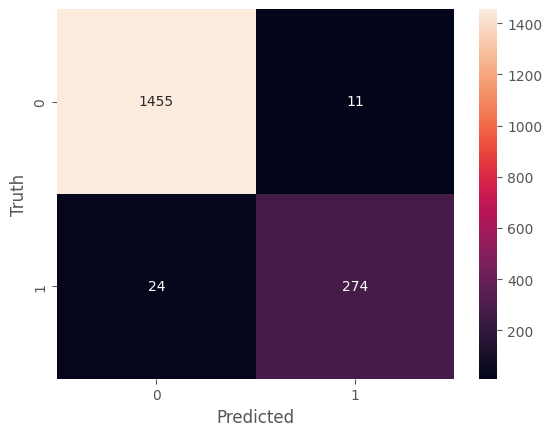

In [79]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, model.predict(X_test)),fmt="", annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth');

In [80]:
from sklearn.metrics import classification_report

print(classification_report(model.predict(X_test),y_test))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1479
           1       0.92      0.96      0.94       285

    accuracy                           0.98      1764
   macro avg       0.96      0.97      0.96      1764
weighted avg       0.98      0.98      0.98      1764



### **Conclusion**
Based on the feature importance scores from the Random Forest Classifier model, the most important factors predicting future user adoption are `total_visits`, `account_age`, `org_id`, and `creation_source_GUEST_INVITE` (specifically Guest Invite and Signup). 

Total visits by a user have the highest importance score (0.94), indicating strong user engagement as a key predictor of adoption. The model shows high accuracy, precision, recall, and F1-score in identifying adopted users. Further research could focus on understanding user behavior patterns leading to multiple logins within a seven-day period, potentially providing insights for improving user adoption and retention. Strategies revolving around increasing user engagement, personalized onboarding processes, and targeted communication based on these key factors could enhance user adoption rates.